In [1]:
%load_ext autoreload
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from faces_clustering import FaceSearcher

Using TensorFlow backend.


# Image Searching

In [2]:
from faces_clustering import display_image

In [3]:
filename1 = '../tests/deputados.jpg'
filename2 = '../tests/doggo.jpg'
filename3 = '/home/paulo/Documentos/slnp_faces_leg_55/62881_b/10_0.jpg'
filename4 = '../tests/carnaval.jpeg'

In [4]:
df_embeddings = pd.read_pickle('../data/leg55_k_means.pkl')

In [5]:
df_embeddings.head()

,urls,embeddings,classes,cluster_kmeans,distance
0,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.17480865, 0.24839097, 0.018389545, 0.398058...",74385_b,8,0.016398
1,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.07091311, 0.04615592, 0.0, 6.4110007, 3.386...",74385_b,134,0.085021
4,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.10499452, 2.5098183, 0.0, 5.429726, 0.61141...",74385_b,134,0.071436
5,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.017898438, 1.6189704, 0.0022666005, 5.99468...",74385_b,134,0.084874
6,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.02720209, 4.4259987, 0.006993143, 5.375417,...",74385_b,134,0.071801


In [6]:
searcher = FaceSearcher(face_embs = df_embeddings, classes_col = 'cluster_kmeans', distance_col='distance')

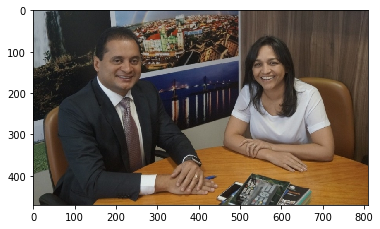

In [7]:
display_image(filename1)
faces, results = searcher.closest_faces(filename1)

In [8]:
for face

[array([[[ 46,  42,  39],
         [ 46,  42,  39],
         [ 46,  43,  40],
         ...,
         [ 39,  35,  32],
         [ 39,  35,  32],
         [ 39,  35,  32]],
 
        [[ 46,  42,  39],
         [ 46,  42,  39],
         [ 46,  43,  40],
         ...,
         [ 38,  34,  31],
         [ 38,  34,  31],
         [ 38,  34,  31]],
 
        [[ 46,  42,  39],
         [ 46,  42,  39],
         [ 46,  43,  40],
         ...,
         [ 37,  33,  30],
         [ 37,  33,  30],
         [ 37,  33,  30]],
 
        ...,
 
        [[ 75,  73,  79],
         [ 75,  74,  79],
         [ 76,  76,  81],
         ...,
         [103,  76,  57],
         [100,  73,  56],
         [100,  73,  56]],
 
        [[ 72,  72,  77],
         [ 72,  72,  77],
         [ 74,  74,  79],
         ...,
         [104,  76,  57],
         [101,  74,  55],
         [101,  74,  55]],
 
        [[ 72,  71,  76],
         [ 72,  71,  76],
         [ 74,  73,  78],
         ...,
         [104,  76,  57],
  